# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [64]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**

### Initial data exploration

In [3]:
#Load Dataset from file
movie_db = pd.read_csv('tmdb-movies.csv')

In [4]:
movie_db.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [5]:
movie_db.shape

(10866, 21)

In [6]:
movie_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning

In [7]:
#Check if there are duplicates
movie_db.duplicated().sum()

1

In [8]:
#Since the ammount of duplicates won't possibly affect the analysis, the duplicate row will be dropped.
movie_db.drop_duplicates(inplace=True)

In [9]:
#create a new df to work on without columns we judge not useful in our analysis
clean_db = movie_db.drop(['imdb_id', 'cast', 'homepage', 'tagline', 'overview','budget_adj','revenue_adj'], axis=1)

In [10]:
clean_db.head()

,id,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [11]:
#check for nulls
nan_df = clean_db[clean_db.isna().any(axis=1)]
display(nan_df.head())

,id,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
130,245706,1.284541,0,4719695,True Story,Rupert Goold,NaN,100,Crime|Drama|Mystery,Plan B Entertainment|Regency Enterprises|New R...,4/17/15,354,6.0,2015
149,346808,1.041922,20000000,0,Momentum,Stephen S. Campanelli,NaN,96,Thriller|Action,Thaba Media|Azari Media,8/1/15,100,5.8,2015
154,314405,1.008474,12000000,0,Il racconto dei racconti,Matteo Garrone,NaN,125,Romance|Fantasy|Horror,HanWay Films|Rai Cinema|Le Pacte|Fonds Eurimag...,5/14/15,211,5.7,2015
155,282984,1.007054,11000000,27391084,Irrational Man,Woody Allen,NaN,95,Mystery|Drama,Sony Pictures|Gravier Productions,7/17/15,319,6.1,2015
160,304372,0.950793,12000000,60273173,The Perfect Guy,David M. Rosenthal,NaN,100,Drama|Thriller,Screen Gems,9/11/15,122,5.6,2015


In [12]:
#drop nulls
clean_db = clean_db.dropna().reset_index()

In [13]:
#shape after null drop
clean_db.shape

(8691, 15)

In [14]:
#Split columns with '|' character to create a list so that it can be exploded later on
split_columns = ['keywords', 'genres', 'production_companies']

for c in split_columns:
    clean_db[c] = clean_db[c].apply(lambda x: x.split("|"))

In [15]:
clean_db.head(1)

,index,id,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",6/9/15,5562,6.5,2015


In [16]:
#drop rows where budget is 0 or 1 and revenue is 0
clean_db = clean_db.query('budget > 1 & revenue > 0')

In [17]:
clean_db.shape

(3677, 15)

In [18]:
#transform release date to proper datetime format
clean_db['release_date'] = pd.to_datetime(clean_db['release_date'])

In [19]:
#create month column
clean_db['month'] = clean_db['release_date'].dt.month

In [20]:
#drop more unused columns
clean_db = clean_db.drop(['index', 'id','release_date'], axis=1)

In [21]:
clean_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 0 to 8674
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3677 non-null   float64
 1   budget                3677 non-null   int64  
 2   revenue               3677 non-null   int64  
 3   original_title        3677 non-null   object 
 4   director              3677 non-null   object 
 5   keywords              3677 non-null   object 
 6   runtime               3677 non-null   int64  
 7   genres                3677 non-null   object 
 8   production_companies  3677 non-null   object 
 9   vote_count            3677 non-null   int64  
 10  vote_average          3677 non-null   float64
 11  release_year          3677 non-null   int64  
 12  month                 3677 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 402.2+ KB


<a id='eda'></a>
## Data Analysis


### General Revenue Information

In [22]:
clean_db['revenue'].describe()

count    3.677000e+03
mean     1.114405e+08
std      1.793625e+08
min      2.000000e+00
25%      1.489942e+07
50%      4.806344e+07
75%      1.298324e+08
max      2.781506e+09
Name: revenue, dtype: float64

<AxesSubplot:>

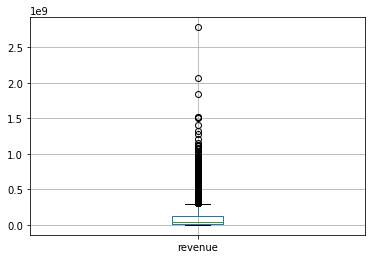

In [23]:
clean_db.boxplot(column = 'revenue')

#### Brief conclusion:

> Only half the movies surpassed the <b>48,063,440 USD</b> mark, even tho the mean is <b>111,440,500 USD</b>. Meaning that there are probably some outliers, like the highest revenue movie, at <b>2,781,060,000 USD</b>.

### How many movies made a profit

In [63]:
#create column for profits
clean_db['profit'] = clean_db['revenue'] - clean_db['budget']
clean_db.head()

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,month,profit,made_profit
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,6,1363528810,True
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,"[future, chase, post-apocalyptic, dystopia, au...",120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",6185,7.1,2015,5,228436354,True
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,"[based on novel, revolution, dystopia, sequel,...",119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2480,6.3,2015,3,185238201,True
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,"[android, spaceship, jedi, space opera, 3d]",136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",5292,7.5,2015,12,1868178225,True
4,9.335014,190000000,1506249360,Furious 7,James Wan,"[car race, speed, revenge, suspense, car]",137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2947,7.3,2015,4,1316249360,True


In [27]:
#create column with a boolean value to check if the movie made profit or had a loss
clean_db['made_profit'] = np.where(clean_db['profit'] > 0, True, False)

In [28]:
clean_db['made_profit'].value_counts()

True     2690
False     987
Name: made_profit, dtype: int64

In [29]:
# % that made a profit
2690/3677

0.731574653249932

In [30]:
clean_db.head()

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,month,profit,made_profit
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,6,1363528810,True
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,"[future, chase, post-apocalyptic, dystopia, au...",120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",6185,7.1,2015,5,228436354,True
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,"[based on novel, revolution, dystopia, sequel,...",119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2480,6.3,2015,3,185238201,True
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,"[android, spaceship, jedi, space opera, 3d]",136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",5292,7.5,2015,12,1868178225,True
4,9.335014,190000000,1506249360,Furious 7,James Wan,"[car race, speed, revenge, suspense, car]",137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2947,7.3,2015,4,1316249360,True


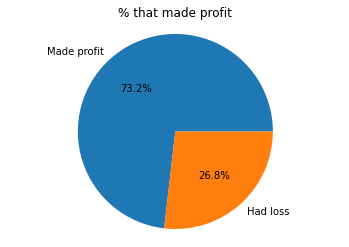

In [31]:
#Graph of findings
my_data = clean_db['made_profit'].value_counts()
my_labels = 'Made profit', 'Had loss'
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%')
plt.title('% that made profit')
plt.axis('equal');

#### Brief conclusion:

> As stated, 2690 movies made a profit, while 987 had financial losses. This equates to <b>73.2%</b> of all movies having some sort of profit.

### Genre vs Revenue

In [32]:
#explode genres for further analysis
genre_db = clean_db.explode('genres')

In [33]:
genre_db.head(5)

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,month,profit,made_profit
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",124,Action,"[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,6,1363528810,True
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",124,Adventure,"[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,6,1363528810,True
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",124,Science Fiction,"[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,6,1363528810,True
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",124,Thriller,"[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,6,1363528810,True
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,"[future, chase, post-apocalyptic, dystopia, au...",120,Action,"[Village Roadshow Pictures, Kennedy Miller Pro...",6185,7.1,2015,5,228436354,True


In [34]:
#mean revenue by genre
genre_db.groupby('genres').mean()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,month,profit,made_profit
genres,,,,,,,,,,
Action,1.608879,5.766337e+07,1.613633e+08,112.115053,832.145733,6.055705,2000.625120,6.768936,1.037000e+08,0.741131
Adventure,1.907224,7.103662e+07,2.232982e+08,112.953103,981.933793,6.141655,2000.073103,7.062069,1.522616e+08,0.776552
Animation,1.751683,7.797554e+07,2.627512e+08,89.743590,913.938462,6.404103,2003.933333,7.266667,1.847757e+08,0.820513
Comedy,1.050939,3.415116e+07,1.014609e+08,101.823161,415.000000,6.042801,2001.477308,6.873239,6.730976e+07,0.754304
Crime,1.140127,3.341141e+07,8.604954e+07,111.960191,531.307325,6.316401,2000.479299,6.807325,5.263813e+07,0.721338
Documentary,0.337566,5.621577e+06,2.649353e+07,103.892857,81.464286,6.671429,2005.571429,5.714286,2.087195e+07,0.785714
Drama,1.031439,2.872189e+07,7.724904e+07,116.284343,431.304139,6.413017,2001.170966,7.420516,4.852716e+07,0.679664
Family,1.519272,6.427876e+07,2.118906e+08,98.890819,713.709677,6.154342,2001.593052,7.161290,1.476118e+08,0.813896
Fantasy,1.779804,7.132102e+07,2.217463e+08,107.737662,917.002597,6.075584,2001.070130,7.031169,1.504252e+08,0.753247


In [35]:
#unique genres
genre = genre_db['genres'].unique()
genre

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'Foreign', 'TV Movie'], dtype=object)

Text(0.5, 0, 'Genre')

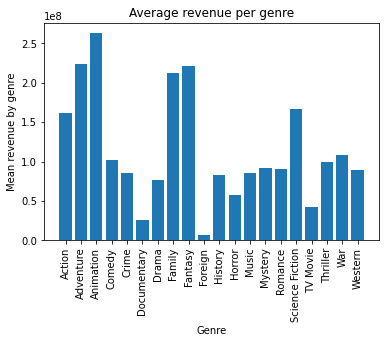

In [50]:
keys = [genre for genre, df in genre_db.groupby(['genres'])]

my_data = genre_db.groupby('genres').mean()['revenue']
plt.title('Average revenue per genre')
plt.bar(keys, my_data)
plt.xticks(genre, rotation='vertical')
plt.ylabel('Mean revenue by genre')
plt.xlabel('Genre')

#### Brief conclusion:

> As we can see, in average, the genres that makes more revenue per movie are : <b>Animation, Fantasy, Family and Adventure</b>.

### Budget vs Revenue Correlation

In [60]:
#Linear regression to find the correlation between budget and revenue
X = clean_db['revenue'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = clean_db['budget'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

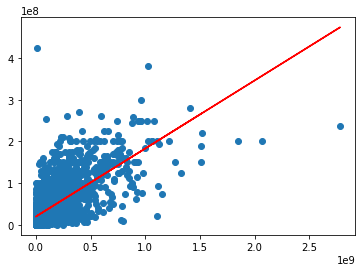

In [61]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [62]:
r2_score(x, y)

0.09655535908224788

#### Brief conclusion:

> As we can see, there is a direct correlation between a movie's revenue and its budget. And based on its R2 score of <b> A higher budget generally means a higher revenue</b>

<a id='conclusions'></a>
## Conclusions

> Based on the charts above, it is safe to conclude that certain genres have generated more revenue for the movie industry over time. Specifically, the <b>Animation, Fantasy, Adventure and Family Genres</b>. Also, we saw that higher budgets tend to have higher revenues. This makes intuitive sense since higher budgets can translate to better actors, higher fidelity graphics, stunts and marketing. 
With the data we can also conclude that most of the movies tend to turn a profit, with <b>73.2%</b> having profited, while <b>26.8%</b> turned to have a loss.

>Even tho the dataset covered a span of over 50 years of data, the analysis is limited by the ammount of usable data we were given. We were originally suplied with over 10 thousand row of data, but less than 4000 turned to be useful to the analysis. Since most of the data had Nulls and 0 valuues. It would be interesting to also have data on what was the budget used for(marketing, actors, etc) to further increment our findings.

>In furthering this study, I would take a closer look at the correlation between directors and movie revenues, or if sequels tended to have higher revenue than its predecessor. And also if the actors influenced the revenue of the movie.


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])